# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

### Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

### Objective
This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

### Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

### Methodology 
1. Importing Libraries 
2. Loading Dataset 
3. Data Cleaning and Pre-processing 
4. EDA 
5. Set Null Hypothesis and Alternate Hypothesis 
6. Perform Statistical Test 
7. Draw Conclusion 

### 1. Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import scipy.stats as st 
import statsmodels.api as sm

import warnings 
warnings.filterwarnings('ignore')

### 2. Loading Data

In [2]:
# The URL that pointing directly to the CSV file
url = 'https://query.data.world/s/ptcuimxf26doohclvfyti7amrb3o7u?dws=00000'

# Read CSV file from URL
df = pd.read_csv(url)

In [3]:
# Display the first few rows to verify
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


Dataset is collected from : https://data.world/

Here is the overview of the dataset: 

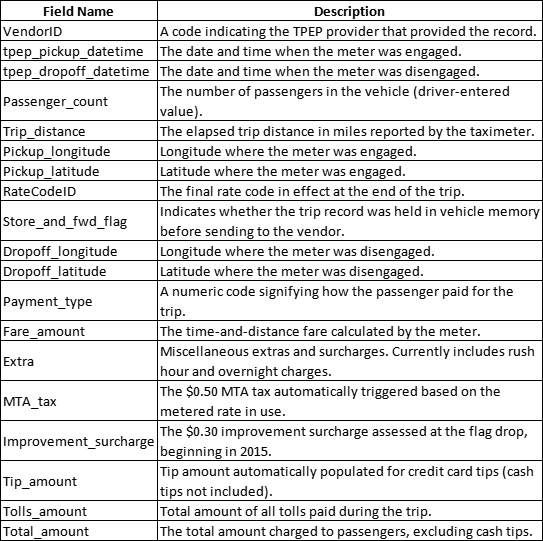

### 3. Data Cleaning & Pre-processing

In [4]:
# Shape of the data 
df.shape

(6405008, 18)

In [5]:
# Basic Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [6]:
# Changing Datatype of Pickup and Dropoff column from Object to DateTime
# Also creating another column called as duration (in min): the time difference between Pickup and Dropoff time

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60 

In [7]:
# Creating a new dataframe based on our required coluns 
data= df[['passenger_count','trip_distance','duration','payment_type','fare_amount']]

In [8]:
data.head()

,passenger_count,trip_distance,duration,payment_type,fare_amount
0,1.0,1.2,4.800000,1.0,6.0
1,1.0,1.2,7.416667,1.0,7.0
2,1.0,0.6,6.183333,1.0,6.0
3,1.0,0.8,4.850000,1.0,5.5
4,1.0,0.0,2.300000,2.0,3.5


In [9]:
# Checking Nulls 
null_counts = data.isnull().sum()

# Calculate percentage of nulls in each column
null_percentages = (null_counts / len(data)) * 100

# Display the results
print("Null percentages per column:")
print(null_percentages)

Null percentages per column:
passenger_count    1.021716
trip_distance      0.000000
duration           0.000000
payment_type       1.021716
fare_amount        0.000000
dtype: float64


In [10]:
# Since the missing % less than 5% and we can not impute manually, We can drop it 

data.dropna(inplace=True)

In [11]:
# Changing data type of these columns 

data['passenger_count'] = data['passenger_count'].astype('int64')
data['payment_type'] = data['payment_type'].astype('int64')

In [12]:
# Checking duplicates

data.duplicated().sum()

3331706

In [13]:
# Dropping Duplicates since it doesn't hold any values or have no contribution

data.drop_duplicates(inplace=True)

In [14]:
# Distribution of passenger_count : Too many values , we will filter it based on out requirements
data['passenger_count'].value_counts(normalize=True)

1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: passenger_count, dtype: float64

In [15]:
# Distribution of payment_type : Too many values , we will filter it based on out requirements
data['payment_type'].value_counts(normalize=True)

1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: payment_type, dtype: float64

In [16]:
# Data Clening based on Passenger Count and Payment type
data= data[data['payment_type']<3]
data= data[(data['passenger_count']>0)&(data['passenger_count']<6)]

In [17]:
# Change column values from number to catagory 
data['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [18]:
# Statistical Overview
data.describe()

,passenger_count,trip_distance,duration,fare_amount
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,4.536729e+00,2.415478e+01,1.780567e+01
std,1.176652e+00,4.895890e+00,9.260031e+01,1.506997e+01
min,1.000000e+00,-2.218000e+01,-2.770367e+03,-5.000000e+02
25%,1.000000e+00,1.500000e+00,9.883333e+00,9.000000e+00
50%,1.000000e+00,2.730000e+00,1.573333e+01,1.300000e+01
75%,2.000000e+00,5.470000e+00,2.336667e+01,2.100000e+01
max,5.000000e+00,2.628800e+02,8.525117e+03,4.265000e+03


In [19]:
# We can see negetive values in these column which has no meaning. So , we need to remove them. 
data= data[data['trip_distance']>0]
data= data[data['duration']>0]
data= data[data['fare_amount']>0]

In [20]:
data.describe()

,passenger_count,trip_distance,duration,fare_amount
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,4.583313e+00,2.418261e+01,1.766835e+01
std,1.179440e+00,4.897806e+00,9.272285e+01,1.447531e+01
min,1.000000e+00,1.000000e-02,1.666667e-02,1.000000e-02
25%,1.000000e+00,1.530000e+00,9.950000e+00,9.000000e+00
50%,1.000000e+00,2.770000e+00,1.575000e+01,1.300000e+01
75%,2.000000e+00,5.500000e+00,2.333333e+01,2.100000e+01
max,5.000000e+00,2.628800e+02,8.525117e+03,4.265000e+03


In [21]:
# Removing outliers using IQR 

for col in ['trip_distance', 'duration','fare_amount']: 
    q1= data[col].quantile(0.25)
    q3= data[col].quantile(0.75)
    IQR = q3-q1
    
    lower_bound= q1 - (IQR * 1.5)
    upper_bound= q3 + (IQR * 1.5)
    
    data= data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]

In [22]:
# Final Data 
data

,passenger_count,trip_distance,duration,payment_type,fare_amount
0,1,1.20,4.800000,Card,6.0
1,1,1.20,7.416667,Card,7.0
2,1,0.60,6.183333,Card,6.0
3,1,0.80,4.850000,Card,5.5
5,1,0.03,0.883333,Cash,2.5
...,...,...,...,...,...
6339550,4,2.40,12.383333,Card,10.5
6339555,3,2.09,14.800000,Card,10.0
6339561,1,4.11,21.500000,Card,17.5
6339563,1,2.13,19.000000,Card,13.0


### 4. EDA 

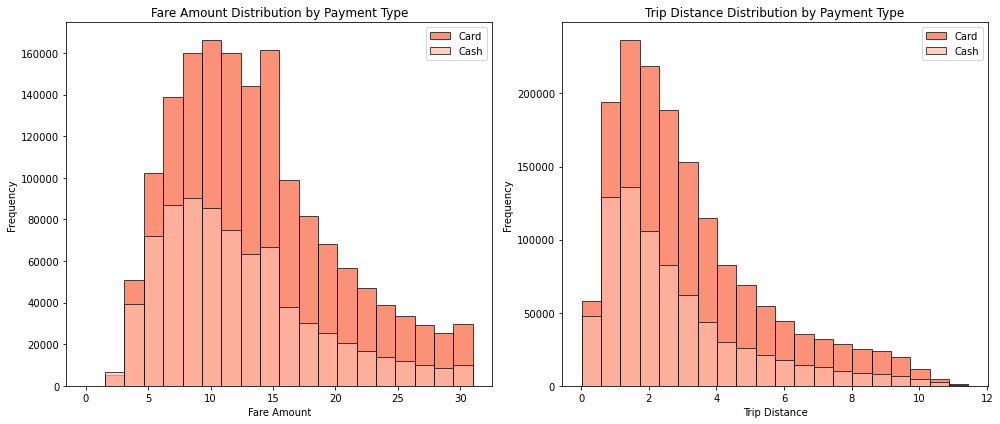

In [23]:
# Distribution of Fare Amount and Trip Distance Bsed on Payment Type 

plt.figure(figsize=(14, 6))

# Left subplot for 'fare_amount'
plt.subplot(1, 2, 1)
plt.hist(data[data['payment_type'] == 'Card']['fare_amount'], bins=20, alpha=0.7, edgecolor='k', color='#FA643F', label='Card')
plt.hist(data[data['payment_type'] == 'Cash']['fare_amount'], bins=20, alpha=0.7, edgecolor='k', color='#FFBCAB', label='Cash')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Fare Amount Distribution by Payment Type')
plt.legend()

# Right subplot for 'trip_distance'
plt.subplot(1, 2, 2)
plt.hist(data[data['payment_type'] == 'Card']['trip_distance'], bins=20, alpha=0.7, edgecolor='k', color='#FA643F', label='Card')
plt.hist(data[data['payment_type'] == 'Cash']['trip_distance'], bins=20, alpha=0.7, edgecolor='k', color='#FFBCAB', label='Cash')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Trip Distance Distribution by Payment Type')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [24]:
# Mean ans standard daviation based on payment type
data.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance': ['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.603247  6.371027      3.187177  2.254620
Cash           12.178968  6.134193      2.772485  2.177792

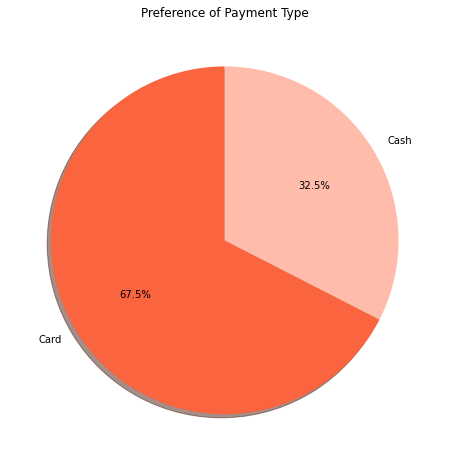

In [25]:
# Distribution of Payment Menthod
plt.figure(figsize=(8, 8))
plt.title('Preference of Payment Type')
plt.pie(data['payment_type'].value_counts(normalize=True), labels=data['payment_type'].value_counts().index, startangle=90, shadow=True, autopct='%1.1f%%', colors=['#FA643F', '#FFBCAB'])
plt.show()

In [26]:
# Lets Create a piviot table to know the percentage of people with different payment type
passenger_count= data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns= {'passenger_count':'counts'},inplace=True)
passenger_count.reset_index(inplace=True)

# Adding new columns that has percentage
passenger_count['perc'] = (passenger_count['counts']/passenger_count['counts'].sum())*100

In [27]:
# To plot a Stacked bar graph we need to create a dataframe 
df= pd.DataFrame(columns= ['payment_type',1,2,3,4,5]) 
df['payment_type'] = ['Card', 'Cash']
df.iloc[0,1:]= passenger_count.iloc[0:5,-1]
df.iloc[1,1:]= passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,Card,40.005726,14.16313,5.251331,2.727807,5.319524
1,Cash,20.045088,6.705764,2.339423,1.400259,2.04195


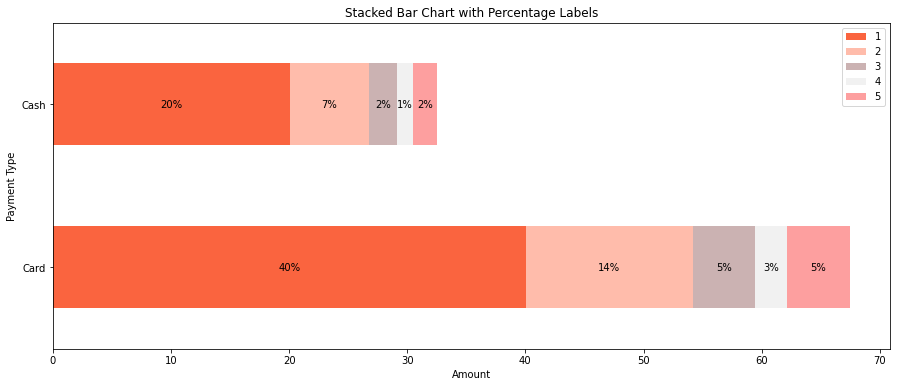

In [28]:
# Stacked bar graph for %passanger vs Payment method
fig, ax = plt.subplots(figsize=(15, 6))

# Plot stacked horizontal bar chart
df.pivot_table(index='payment_type', aggfunc='sum').plot(kind='barh', stacked=True, ax=ax, color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'])

# Add percentage text labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),  # Display percentage with no decimal places
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=10,  # Adjust font size as needed
            color='black')  # Text color

# Set labels and title
ax.set_xlabel('Amount')
ax.set_ylabel('Payment Type')
ax.set_title('Stacked Bar Chart with Percentage Labels')

# Display the plot
plt.show()

### 5. Set Null Hypothesis and Alternative Hypothesis

## Null Hypothesis: There is no difference in average fare between customers who use credit cards and customer who use cash.

## Alternative Hypothesis: There is difference in average fare between customers who use credit cards and customer who use cash.

### Test Finalization: 
We can not perform Anova (due to two group), and Chi Square (due to numerical variable) Test.            
So, T and Z test are there. 

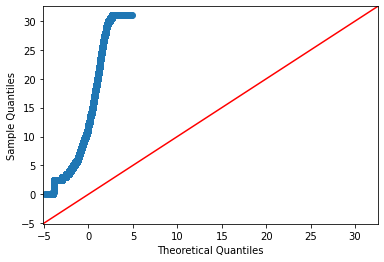

In [29]:
# Checking Distribution 
sm.qqplot(data['fare_amount'], line='45')
plt.show()

### We can not perform Z test. 
1. Not normal distribution. 
2. Population Standard deaviation is unknown. 

So, We need to persorm T Test.

In [30]:
card_sample =data [data ['payment_type']=='Card']['fare_amount'] 
cash_sample= data [data ['payment_type']=='Cash']['fare_amount']

In [31]:
t_stats, p_value = st.ttest_ind(a= card_sample, b= cash_sample, equal_var= False) 
print('T statistic', t_stats,'\n', 'p-value', p_value)

T statistic 165.2987032225178 
 p-value 0.0


### Conclusion:
Based on sufficient evidence from the t-test performed, with a p-value of 0.0, we reject the null hypothesis and accept the alternative hypothesis.